--- 
Project for the course in Microeconometrics / OSE Data Science | Summer 2021, M.Sc. Economics, Bonn University | [Jonathan Willnow](https://github.com/JonathanWillnow)


# Replication of Dreher et al. (2021): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset  <a class="tocSkip">   
    
    
---
      

This notebook is replicating the following paper:

> Dreher et al. (2021): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset. American Economic Journal: Economic Policy, vol. 13(2), May 2021 (pp. 135-174).



##### Downloading and viewing this notebook:

* The best method to access this notebook is to download it from the repository on [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow). Other viewing options, such as _MyBinder_ or _NBViewer_, may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow) on GitHub).


* The original paper as well as the data and STATA code is provided by the authors [here](https://www.aeaweb.org/articles?id=10.1257/pol.20180631). If the reader does not have an access to the American Economic Association, the version published in March 2020 can be found on the website of Axel Dreher [here](http://www.axel-dreher.de/Dreher%20et%20al._Aid_China_Growth.pdf). 


* Please note that I use the dataset and the paper that was published in the American Economic Journal in May 2021. If you follow along this notebook with the free 2020 version of the paper, slight differences in results and labeling occur.

##### Information about replication and individual contributions:

* For the sake of readability and comprehension, I mainly adhere to the original structure of the paper in this notebook, although I deviate from it if it helps my replication. This enables readers to easily follow the notebook and compare it to the paper. The tables and figures of this notebook are named and labeled in the same way that they appear in Dreher et al. (2021).


* As the replication of the paper progresses, I keep adding independently extensions (or deviate from the methodology of the authors). In order to clearly delineate these sections from the replication, all these sections are indicated as **extensions**.




---
# Table of Contents
---

 1. [Introduction](#introduction)
 2. [The Tracking Underreported Financial Flows (TUFF) Methodology](#section2)
 3. [Descriptive Statistics & Allocation of Chinese Development Finance](#section3)
   *  3.1 [The Distribution of Project Types](#section3.1)
   *  3.2 [Sectoral Distribution](#section3.2)  
   *  3.3 [Finance Form of Projects](#section3.3)  
   *  3.4 [Cross-country Distribution of Chinese Development Finance](#section3.4)  
   *  3.5 [Factors that determined Allocation of Chinese Development Finance](#section3.5)  
       *  3.5.1 [Extension - Descriptive Plots](#section3.5.1)  
       *  3.5.2 [Physical Project Inputs](#section3.5.2)  
       *  3.5.3 [Foreign Exchange Reserves](#section3.5.3)
   *  3.6 [Mixed Effect Models](#section3.6) 
 4. [Identification](#section4)
 5. [Empirical Strategy](#section5)
   *  5.1 [IV Strategy](#section5.1)
   *  5.2 [Model Specifications](#section5.2)
   *  5.3 [Checking Parallel Trends Assumption](#section5.3)
 6. [Does Chinese Development Finance Promote Growth?](#section6)
   *  6.1 [Main Results](#section5.1)
   *  6.2 [Extension - Visual Representation of Results](#section6.2)
   *  6.3 [Extension - Checking Instrument Validity](#section6.3)
   *  6.4 [Timing of the Growth Effects](#section6.4)
   *  6.5 [How does Chinese Development Finance cause Growth?](#section6.5)
   *  6.6 [Robustness Checks](#section6.6)
 7. [Conclusion](#section7)
 8. [References and Literature](#section8)





### Library imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
import geopandas 
import linearmodels as lm
import itertools as tools
import scipy.stats as scipy
from IPython.display import HTML

In [2]:
from auxiliary.auxiliary_preparations import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_regressions import *
from auxiliary.auxiliary_methods import *

---
# 1. Introduction <a name="introduction"></a>
---

The Belt and Road Initiative (BRI), better known as the "New Silk Road Initiative", is just one of many instances of China's overseas activities of financing development which is especially known to the Europeans. Other projects, mostly infrastructure projects (by transaction value), link China within Asia and with the African continent. This role of China as a significant donor raises strong opinions, but the debate is based on only little facts since most of the details are not officially reported. The paper at hand uses the Tracking Underreported Financial Flows (TUFF) methodology to introduce a new dataset that provides the necessary evidentiary foundations that are needed for this issue.

Dreher et al. (2021) address the following questions: 

* What determines the allocation of Chinese development finance?
* Does China's financial development finance lead to economic growth?
* Does China's finance undermine the effectiveness of Western development finance?

In this notebook, I focus on the first two highlighted questions by replicating and expanding on the work of Dreher et al. (2021).

One could argue that Chinese development aid may be similar to Western development aid. It might trigger growth via the same variables that have been identified by previous aid- and development literature, namely increasing physical investment, human capital accumulation, consumption, or an increase in the performance of firms. Others, especially critics of China's increasing role in the world and as a donor for aid, have other beliefs. Frequently used arguments are that excessive amounts of Chinese development finance deters foreign investment, and that host countries might experience foreign exchange shortages which constrains growth in exports. Other researchers argue that host governments have difficulties to serve their debt since China also finances unproductive projects.

To provide an answer to the question whether and how Chinese development finance affects economic growth, instrumental variables are employed that make use of the year-to-year changes in the supply of Chinese development finance (which will be introduced) in tandem with cross-sectional variation which is determined by the probability that countries receive such funding.

As stated, the structure of the notebook mostly follows the paper. Following this introduction in Section 2, I will introduce the reader to the _Tracking Underreported Financial Flows (TUFF) methodology_ which was used for coding the data. Section 3 focuses on descriptive statistics to explore the dataset and to answer what factors determine the allocation of Chinese development finance. Section 4 discusses the identification strategy as an extension of the paper before I will investigate the empirical strategy of the authors in Section 5. The results whether Chinese development finance promotes growth will be provided in Section 6 along with a number of extensions and robustness checks. Furthermore, I will examine how Chinese development finance causes growth. Section 7 will conclude the replication and findings. 


---
# 2. The Tracking Underreported Financial Flows (TUFF) Methodology <a name="section2"></a>

---

The data set is constructed using the Tracking Underreported Financial Flows (TUFF) methodology which codifies a set of open-source data collection procedures in a systematic, transparent, and replicable way. This methodology was originally developed by Strange et al. (2012) in collaboration with AidData, a research lab at William and Mary, and has been used and improved many times. It enables us to identify detailed financial, locational, and even operational information about officially financed projects that are not recorded by the donors and lenders (here China) through the international reporting systems, like the OECD’s Creditor Reporting System (CRS) or the International Aid Transparency Initiative (IATI). 


Since the authors of the paper address the relevance of this methodology many times and the constructed data set is unique in its range and accuracy, we will briefly explore the TUFF methodology.  

### First Stage
The first stage represents the stage of primary data collection. All recorded projects of interest were collected. At the same time, a standard set of search queries was used to identify and collect potential projects at the donor/lender-recipient/borrower-year unit. The database of choice for this dataset is the media database Factivia which collects newspapers, radio, and television transcripts worldwide in 28 languages. This set of documents is then filtered using a machine learning algorithm that has been trained on a large number of previously detected and categorized documents. A subset of documents is determined that are most likely to provide information about officially funded projects by China. Each object of the subset is then reviewed by the team and assessed whether it contains the information or not. 

### Second Stage
The gathered set of documents is then subject to a second examination to validate or invalidate it and potentially add to the project information in order to improve the accuracy and scope. This is performed by native speakers and language experts. For this specific dataset, the researchers additionally obtained information from entities such as private contractors of projects, experts with unique tacit knowledge for specific projects, and external reviewers who fieldworked on a specific project or country. As a measure of validity, the researchers calculate systematically triangulation and completeness scores for each project. This triangulation and associated score improves the validity and minimizes systematic risk while avoiding over-reliance on Factivia. 

### Third Stage
The aim of the third stage is to maximize the reliability and completeness of the records on the individual projects through quality assurance procedures. This involves the identification and correction of inconsistent coding, e.g caused by different categorized standards, several de-duplication procedures, and the vetting of each individual project record by higher ranking researchers as this whole process involves a large number of researchers and assistants. The triangulation and completeness scores identify all projects with poor records and relatively high transaction value and subject them to a second evaluation.
Finally, the constructed dataset gets peer-reviewed by internal and external reviewers. More than 30 external and internal reviewers were involved in this particular dataset.


---
<span style="color:blue">**NOTE**:</span> More information about AidData´s TUFF Methodology, its development, and coder instructions can be found [here](https://www.aiddata.org/publications). This section was based on Strange et al. (2017): AidData's Tracking Underreported Financial Flows (TUFF) Methodology, Version 1.3. Williamsburg, VA: AidData at William & Mary.



---

---
# 3. Descriptive Statistics & Allocation of Chinese Development Finance <a name="section3"></a>
---

In [3]:
CDF_data = pd.read_stata("data/work2_dataset_CDF.dta")
CDF_data.shape

(4304, 61)

The first dataset of Dreher et al. (2021), constructed with the introduced TUFF methodology, covers 4,304 Chinese financed development projects that were committed, implemented or completed between 2000 and 2014 in 138 countries worldwide, based on 15,500 unique sources of information as described above. As can be seen by the output, it contains 61 columns that describe the 4,304 projects.


## 3.1. The Distribution of Project Types <a name="section3.1"></a>

The authors distinguish between three different categories of development financing:

* ODA-like projects for the promotion of economic or social development, provided at levels of concessionality that are consistent with the ODA criteria established by the OECD-DAC. These projects are widely considered as strict development aid.


* OOF-like projects, that have a non-development purpose like export promotions with insufficient concessionality to qualify as ODA (e.g. loans at market rates).


* Vague-OF projects, which receive official financing, but cannot be properly categorized because of the insufficient information at hand that were collected using the TUFF methodology. Therefore, one needs to account for this limitation of the data. We will combine this sort of projects with the OOF-like projects to OOFV-like projects, as will be explained in section 3.3.

---
<span style="color:blue">**NOTE**:</span> More information on OECDC-DAC can be found [here](https://www.oecd.org/dac/development-assistance-committee/):  

---


The dataset not only allows us to look at the number of projects, but also to divide the projects into the following three classes by their financial value: 


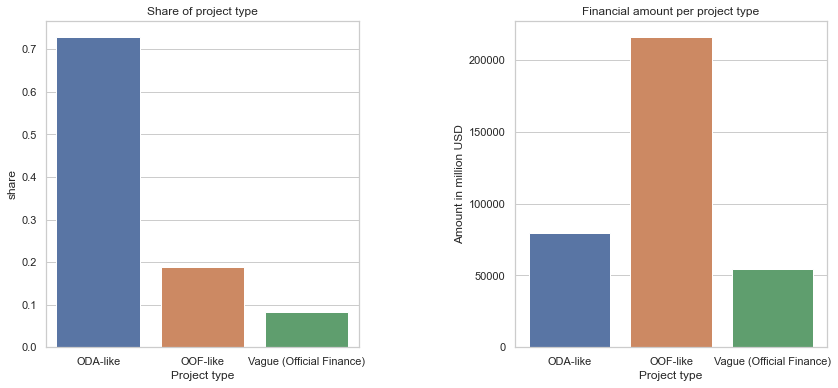

In [4]:
flow_class_df = flow_class_plot(CDF_data)

The actual distribution of Chinese financial development finance:

In [5]:
flow_class_df

,flow_class,Share,Amount in mio 2010 USD
0,ODA,0.729554,79575.58
1,OOF,0.187965,216280.74
2,Vague,0.082481,54711.14


As the plot shows and the provided dataframe confirms, the vast majority of projects (73%) are ODA-like projects with an OECD-DAC level of concessionality. When shifting the focus of the analysis to the financial value of the projects, these 73% of total projects only account for roughly 22% of the total financial amount of Chinese development finance. 
The majority of Chinese financing is OOF-like. Because of the nature of the OOF-like projects (export promotions, market-rate loans,...), this high financial value may already indicate that the Chinese government employs development finance primarily to help itself.

## 3.2 Sectoral Distribution <a name="section3.2"></a>

The dataset contains the OECD-DAC sector classifications of each coded project. This enables us to get an insight on how the Chinese government allocates its development finance towards the sectors.

Again, it is critical to distinguish between the quantity of projects per sector and the financial value of development funding invested in this sector by the Chinese government. The two plots indicate that by far the largest financial value is invested in the sectors of energy, followed by transportation, and industry, mining, construction. While looking at the project counts per sector, the picture is completely different: Most projects are in the health-, education- and governance sector, but do only account for around 2% of the total financial value of Chinese development finance.

##### Extension: Sectoral plot and function to explore the sectors

All projects of the health-, education, and governance sector account for 2.69% of the total financial value,
whereas the energy-, transportation, and industry/mining sector accounts for 71.50%


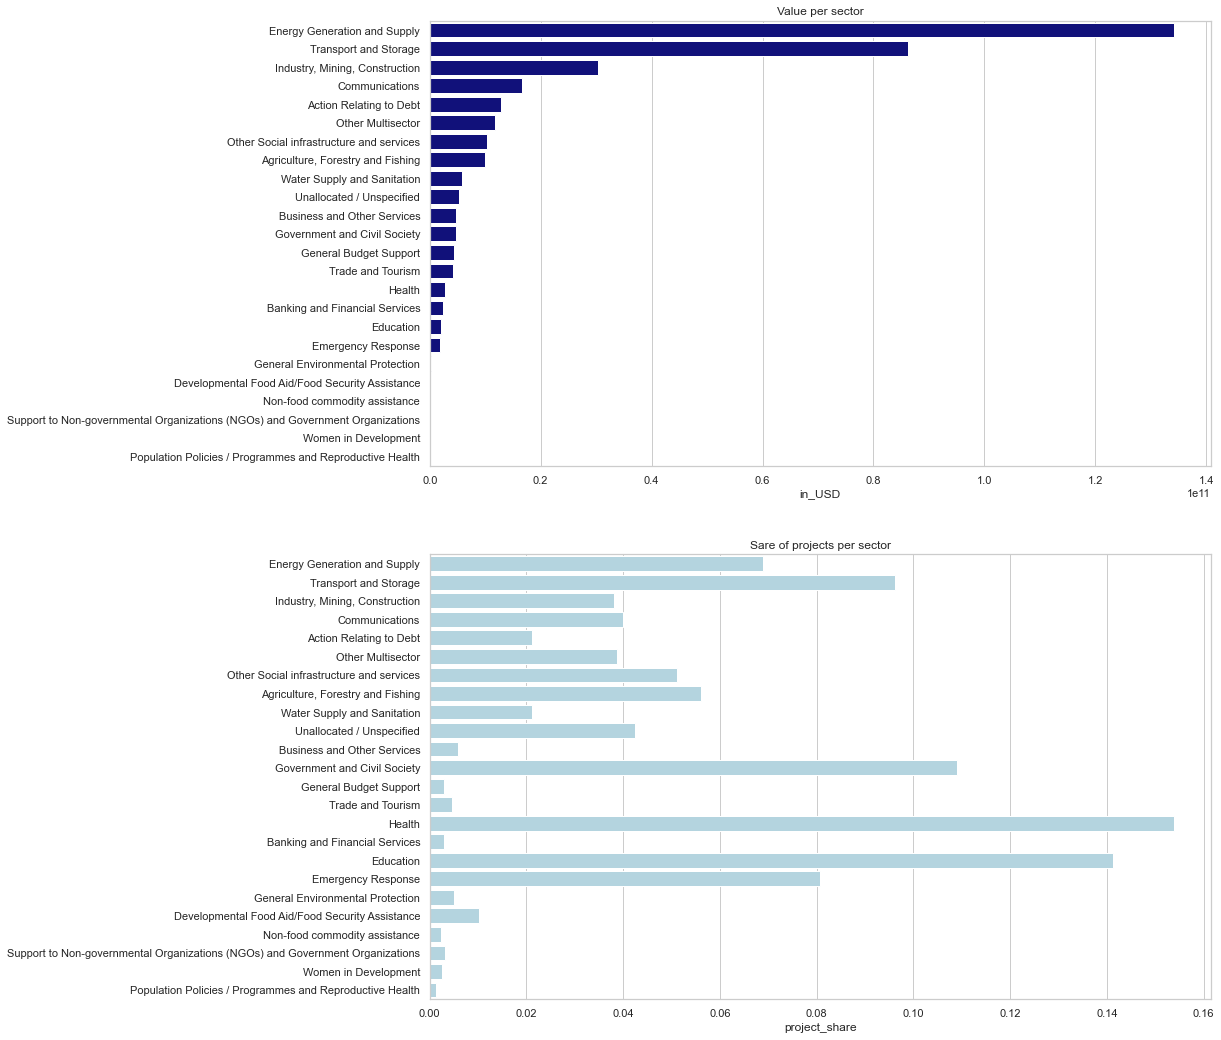

In [6]:
sectoral_plot(CDF_data)

The first two plots already reveal an essential characteristic of Chinese development finance. The Chinese government instrumentalizes the development aid as a self serving tool to increase its exports. The findings of the sectoral distribution analysis of Chinese development finance lend support to this hypothesis. Clearly, the concentration in terms of financial amount is on the energy-, transportation-, and industry/mining sectors, which account for 71.50% of the total Chinese development finance amount from 2000 to 2014.

As a consequence, I will check the share of the project type for each sector. Following the previous analysis, I expect the share of OFF-like projects to be disproportionally higher in sectors with a small amount of Chinese development finance and vice versa.

##### In the following you can have a look at the individual shares of project types in the different sectors:

---
<span style="color:blue">**NOTE**:</span> I had to disable the explore_sectors() function because of conflicts with the continuous integration of GitHub. **To enable the fucntion, remove the** **#** **in line 4 and comment on the first line.**

---

In [7]:
def explore_sectors(data):
    sector = "Education" # Default for education sector. Comment this line out in order to enable the function
    #### Please delete the comment in [4] for this function to properly work
    #sector = input("Enter sector name (as in the plot above): ")
    try:
            val = str(sector)
    except (ValueError, KeyError):
            print("One more try: Enter a valid sector \n Try again:")
            sector = input("Enter sector name (as in the plot above): ")

    stats = data[data.crs_sector_name == val].flow_class.value_counts(1).to_frame("Percentage");
    stats.Percentage = round(stats.Percentage,4)*100
    stats["Absolute"] = data[data.crs_sector_name == val].flow_class.value_counts()
    try:
        return stats;
    except:
        print("\nError! Please try this again. Example for input: Transport and Storage")
    

In [8]:
explore_sectors(CDF_data)


,Percentage,Absolute
ODA-like,59.38,361
OOF-like,38.98,237
Vague (Official Finance),1.64,10


## 3.3 Extension: Finance Form of Projects <a name="section3.3"></a>


How are the Chinese-funded projects structured? What forms of finance do they take on? The dataset allows us to investigate the form of finance of the development projects. The following plot illustrates how the Chinese development-financed projects are funded. 

As the authors move on in their analysis, they combine OOF-like and vague OF-like projects together to OOFV-type projects. They argue that most Vague OF is actually OOF since the observed attributes of these projects resemble the attributes of OOF projects (e.g. infrastructure sector and loan financed). Thus, comparing ODA and OOFV- type projects should reveal differences in these project types.

As the plot indicates, most Chinese development projects appear as a grant. When looking at the financing of OOF-like projects, the Chinese government excessively uses loans and export credits as a form of development finance, which is in line with our previous analysis.

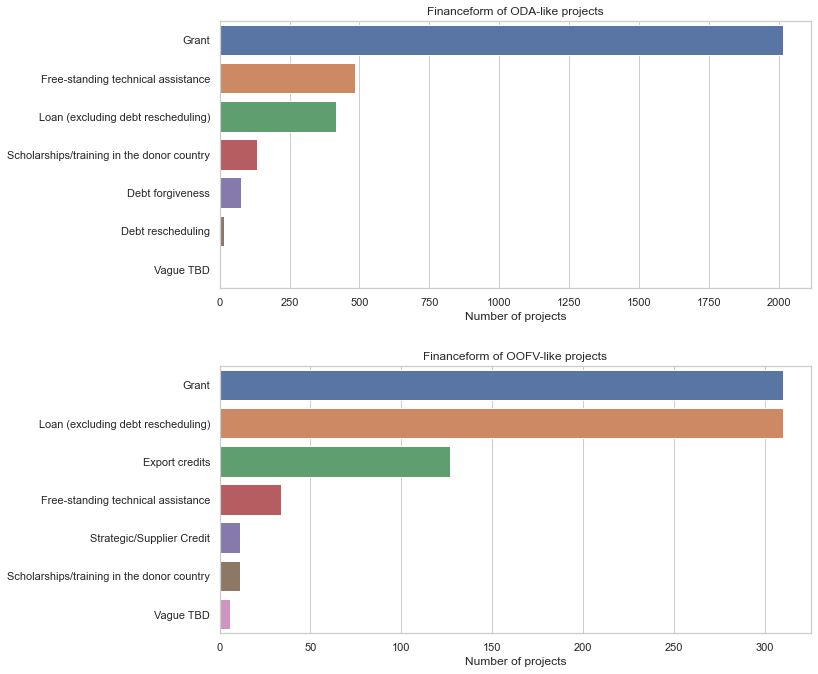

In [9]:
financeform_plot(CDF_data)

## 3.4 Cross-country Distribution of Chinese Development Finance <a name="section3.4"></a>


When looking at the cross-country allocation of the total number of Chinese development finance, the results are consistent with extant academic sources. 

Out of the top ten recipient countries, seven are from the African continent: 

In [10]:
CDF_data.all_recipients.value_counts().sort_values(ascending = False)[:10]

Cambodia     168
Pakistan     121
Zimbabwe     120
Angola       110
Sudan        108
Tanzania     101
Ghana         95
Kenya         89
Ethiopia      88
Sri Lanka     86
Name: all_recipients, dtype: int64

The cross-country allocation in terms of financial value invested in recipient nations, on the other hand, shows a different picture, with Russia being the top beneficiary of Chinese development funding. The financial amount is measured in millions of constant 2009 USD.

In [11]:
CDF_data.groupby("all_recipients").usd_defl.sum().sort_values(ascending = False)[:10]

all_recipients
Russia          3.662258e+10
Pakistan        2.432477e+10
Angola          1.655638e+10
Ethiopia        1.483371e+10
Sri Lanka       1.268011e+10
Laos            1.201567e+10
Venezuela       1.121902e+10
Turkmenistan    1.067643e+10
Sudan           1.023677e+10
Ecuador         9.952516e+09
Name: usd_defl, dtype: float64

The following plot summarizes the cross-country allocation of the Chinese development finance. Again, we can distinguish between the project count which is expressed as a share of years from 2000 to 2014 that country $i$ has received Chinese development finance, and the financial amount that the country received. As pointed out before, depending on how we want to measure Chinese development finance, the worldplot will give us substantially different results.

In [12]:
map_data = pd.read_stata("data/map_1yw_merge.dta")

Choose **probaid_PRC_OFn_all** for project count in the 200-2014 period

Choose **OFa_all_con** for the financial amount received in the 2000-2014 period

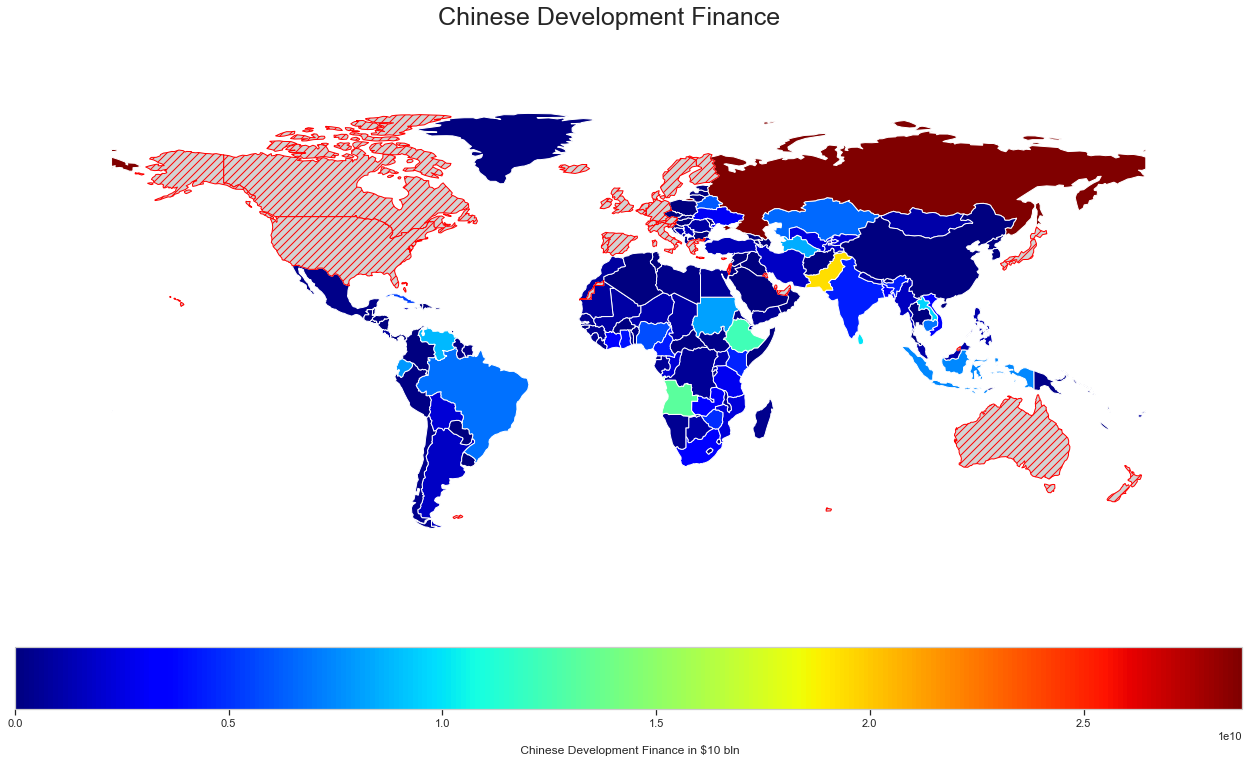

In [13]:
#worldplot_2(world_plot_data, "recipient_iso3", "probaid_PRC_OFn_all")
worldplot_2(map_data, "recipient_iso3", "OFa_all_con")


## 3.5 Factors that determined Allocation of Chinese Development Finance <a name="section3.5"></a>

The following section focuses on relevant factors for the allocation of Chinese development finance:

* First, I extend the paper and reproduce the findings using simple but highly interpretable descriptive statistics as they provide a simple but well elaborated view on this issue. In addition, this aims towards giving the reader of this notebook a better understanding of the variables that are relevant for the allocation without setting up regression models.


* Afterwards, I follow the authors by providing mixed effect models as well as panel-data models to verify the insight obtained by the plots.

For the following part, a third dataset is needed. This dataset contains all the factors that the authors thought to could have a relevant effect on the allocation of the Chinese development finance.
All variables are coded for a given country and a given year. Some variables start earlier than the year 2000, which is due to the lagged character of some variables of interest in the dataset. After loading and preparing the data, we obtain the following prepared dataset:



In [14]:
allocation_data = get_allocation_data();
allocation_data.head(5)

,code,year,countryname,OFn_all,OFn_oda,OFn_oofv,prob_PRCaid_2000,factor1,OFa_all_con,OFa_oofv_con,...,A_Ltaiwanr,A_LDebtGDP,A_LIconcor,A_disaster_ln,A_Ltrade_con_ln,A_Lunsc,A_LINLINECHN,A_Lenglish,factor1_1,det_reservesCHN_con_1
39,AGO,2000-01-01,Angola,1.0,1.0,0.0,0.066667,-1.642051,0.000000e+00,0.000000e+00,...,0.0,165.251999,-1.417777,11.279757,19.956806,0.0,0.98113,0.0,-1.056065,-0.121037
40,AGO,2001-01-01,Angola,2.0,2.0,0.0,0.066667,-1.509742,1.084596e+06,0.000000e+00,...,0.0,89.903000,-1.516698,10.608267,21.552462,0.0,0.97436,0.0,-1.642051,-0.119968
41,AGO,2002-01-01,Angola,9.0,8.0,1.0,0.066667,-1.294446,2.638178e+08,0.000000e+00,...,0.0,80.173500,-1.326816,3.583519,20.636229,0.0,1.00000,0.0,-1.509742,-0.067196
42,AGO,2003-01-01,Angola,1.0,1.0,0.0,0.066667,-0.930074,1.927031e+07,0.000000e+00,...,0.0,72.972000,-1.136933,6.723832,21.023651,0.0,1.00000,0.0,-1.294446,-0.032252
43,AGO,2004-01-01,Angola,3.0,1.0,2.0,0.066667,-0.207976,8.831566e+07,8.831566e+07,...,0.0,59.770599,-1.303790,12.790635,21.720728,1.0,0.98148,0.0,-0.930074,-0.008290



### 3.5.1 Extension - Descriptive Plots <a name="section3.5.1"></a>

I decided to add this extension since the following descriptive plots provide a simple but powerful insight without setting up any sort of models as I will do in the following section. The plots are divided into violinplots (for binary variables) and scatterplots (for quantitative variables) for selected variables of the dataset. Violinplots are a useful tool since they allow to compare the peaks, valleys, and tails of the density curve between the plots in order to detect similarities and differences.

I chose the variables in the plots based on the authors' approach in the study, which was based on modern aid allocation literature. In accordance with the preceding sections, I plot all of the selected variables in terms of project counts as well as the financial amount of Chinese development aid.

The following variables are depicted:


##### Qualitative variables


 
* *A_D99petroleum*, indicates whether a recipient country produces Oil,
* *A_Ltaiwanr*, whether a recipient recognizes the Taiwanese government,
* *A_Lenglish*, official language is English


##### Quantitative Variables


 
* *A_LINLINECHN*, voting alignment in the UN General Assembly,
* *A_LDebtGDP*, recipient countries debt,
* *A_Lpopulation_ln*, population size, log,
* *A_Lpolity2*, policy score of country




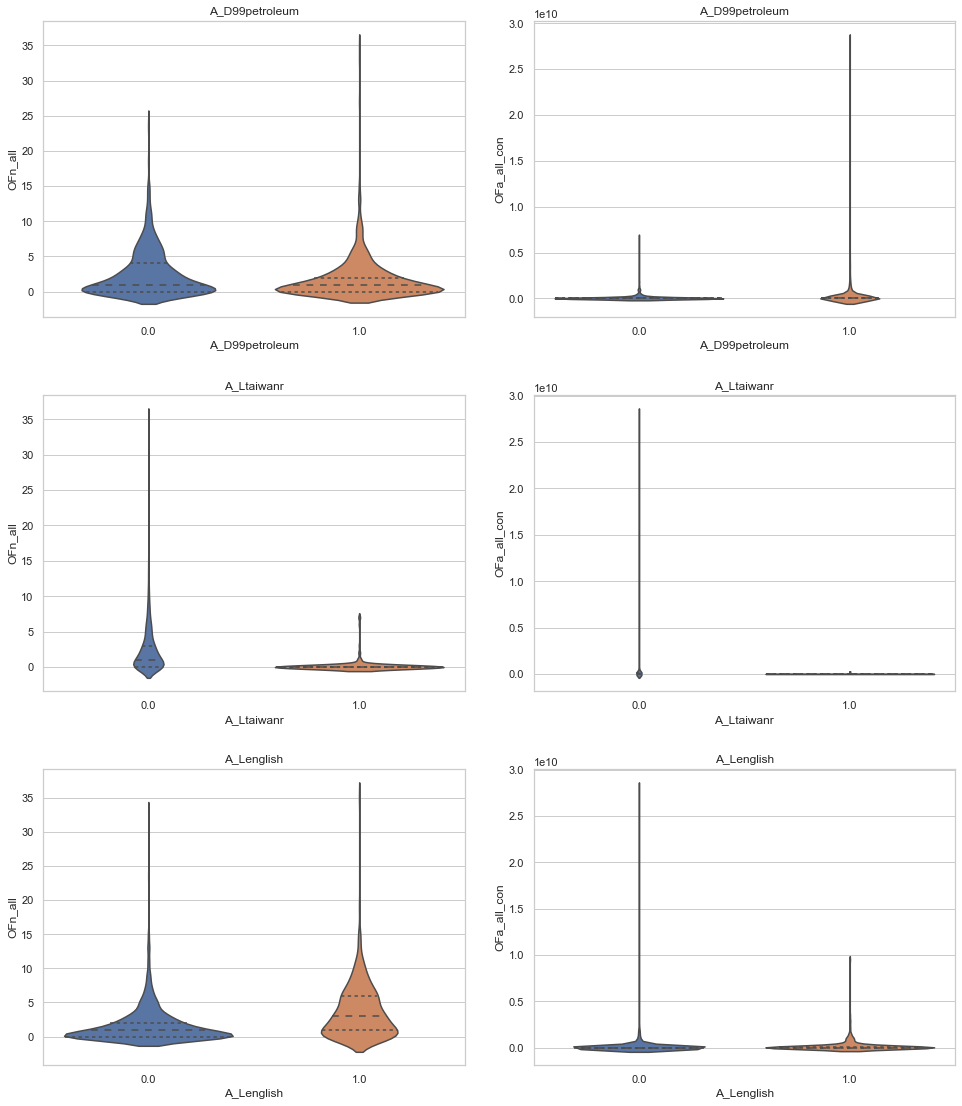

In [15]:
columns_of_interest = ["A_D99petroleum","A_Ltaiwanr","A_Lenglish"]
quali_descriptive_plots(allocation_data, columns_of_interest)

Feel free to change the parameter hue. This groups the variables accordingly and produces points with different colors from which more insights can be gained.

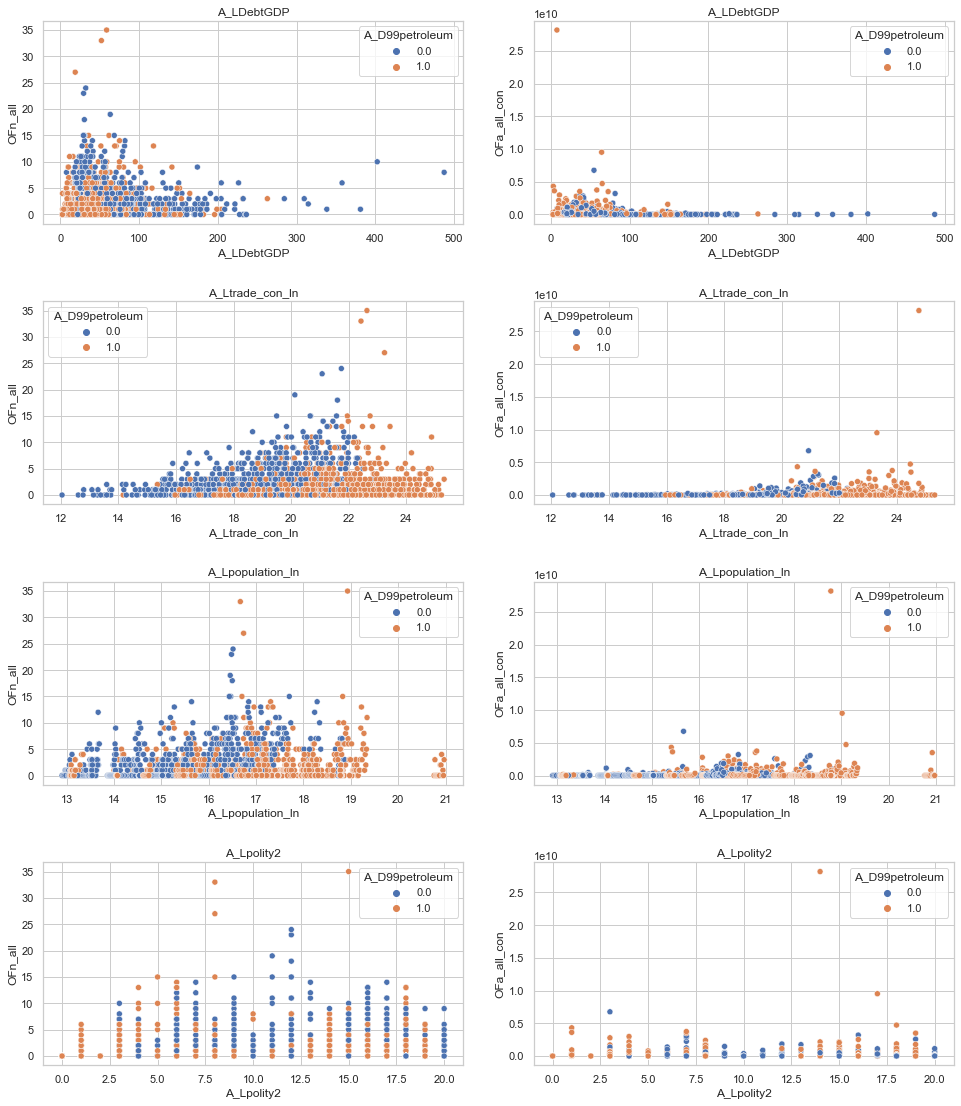

In [16]:
hue = "A_D99petroleum"

columns_of_interest_scatter = ["A_LDebtGDP","A_Ltrade_con_ln","A_Lpopulation_ln","A_Lpolity2"]
quanti_descriptive_plots(allocation_data, columns_of_interest_scatter, hue)

**From these simple plots we can already draw some preliminary conclusions which still need to be verified.**

To give an example of the interpretation: For example, the violinplot (top left) shows the binary variable whether a country is an oil producer (AD99_pertolum) against the number of projects for a given country and year. As can be observed, the interquartile range (50% of observations) for not being an oil producer indicates that not being an oil producer is relevant for the allocation of Chinese development projects, although there are some outliers for oil producing countries that distort the picture. Furthermore, we can compare the thickness of the plotswhich indicates the underlying density curve. According to the aforementioned example, it follows that there are more oil-producing countries in a given year that receive no projects than non-oil-producing countries. Looking at the other plots, it follows that acknowledging the Taiwanese government is negatively related to Chinese development finance whereas English speaking countries receive more Chinese finance. For the scatterplots, we clearly see that a country receives more development finance if it has a low debt-to-GDP ratio and is trading a lot with China. 

Overall, it appears that the majority of the variables described are attributable to the allocation of Chinese development finance. However, when examining the plots for population size and policy score, there appears to be no evident association between the number of projects or the financial amount.  

As a result, we may predict that such variables are not relevant for the allocation of Chinese development finance. 

Looking at all of the violin plots, we can see that all of our variables of interest appear to be more related to the number of projects received by a country in a particular year than to the financial value of those projects. When looking at the quantitative variables in the scatterplot, this observation is validated.



### 3.5.2 Physical Project Inputs <a name="section3.5.2"></a>

Following the previous development aid research, the authors focus on a key determinant of the supply of Chinese financing which is the level of industrial overproduction. According to prior study, the Chinese government considers domestic manufacturing inputs such as aluminum, cement, glass, iron, (...) to be strategically important commodities. As a result, and taking into account the various state-subsidized, overleveraged enterprises, domestic demand for these materials significantly exceeds supply. To address this issue, the Chinese government not only aims to reduce domestic supply by prohibiting new production facilities, but also desperately tries to increase international demands by subsidizing foreign infrastructure projects and providing finance conditional on the purchase of its overproduction. 

**This is in line with the aforementioned findings**: 
* First, the majority of Chinese development aid measured in USD are OOF-like projects, which have non-development purposes such as export promotions.


* Second, as seen earlier, the three sectors that receive most of all Chinese development finance (energy-, transportation and industry/mining sector) account for 71.50% and are relying on these physical production inputs.

As a consequence, when industrial overproduction rises, the Chinese government's financing for economic infrastructure projects abroad is projected to rise. This two-pronged strategy of reducing the supply and increasing the international demand is incorporated into the BRI and embedded in various official statements. 

### 3.5.3 Foreign Exchange Reserves <a name="section3.5.3"></a>

Following the intuition from the previous section, China needs to address the outlined oversupply problem. Until China was "opening up", their foreign exchange reserves were increasing due to trade surpluses and the authorities were aware that allowing these reserves to enter the domestic economy posed a risk of inflation and currency revaluation. Furthermore, the number of domestic projects that needed finance was declining, which added another incentive to invest overseas. Facing this issue, China raised foreign exchange-denominated loans significantly in order to create favorable conditions for its own continuous economic growth. This foreign exchange reserves yielded 3% annual return during the period of interest, so the Chinese government institutions had a strong incentive to price foreign currency-denominated loans to oversea borrowers above this reference rate. 


**To further investigate on this initial conclusions, we will follow Dreher et al. (2021) and introduce mixed effect models.**

## 3.6 Mixed Effect Models <a name="section3.6"></a>

Since the authors do not explain their motivation for choosing mixed effect models, I outline the intuition behind such models and how I approach them:

Standard linear models (such as OLS) are best suited when all the observations come from a single homogeneous group without any underlying structure. If we recall the structure of the dataset at hand, we have panel data observations that belong to nested subgroups within the dataset. This suggests that the dataset's subgroups could explain some of the variance. This is quite intuitive, because we are observing a set of countries over the same time horizon, and there are definitely some impacts that differ across countries or years within the dataset. Taking variations between those subgroups into account may lead to more accurate responses to the question of what factors determine the allocation of Chinese development finance.

There are two variables for which we could define such proper subgroups:

* year
* countryname

In the following, I will rebuild the fixed- and random effect models from Table 1. Opposing to the authors, I will start by setting up an OLS model that serves as a baseline model. Afterwards, I replicate the models set up by Dreher et al. (2021) and start with the random effect models.

In [17]:
allocation_data_lagg = allocation_data.set_index(["countryname", "year"])

First, I use  linearmodels PooledOLS which is plain OLS that understands various panel data structures. This simple model is useful as a base model from where we can explore the random- and fixed effects models.



In [18]:
exog_variables = ["A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(allocation_data_lagg[exog_variables])

mod = lm.panel.PooledOLS(allocation_data_lagg.OFn_all, exog)
mod_pooled = mod.fit()
#print(mod_pooled)

Next, I set up the random effects model. According to Wooldridge (2010), pooled OLS is employed when selecting a different sample for each time step, here year, of the panel data. Fixed effect or random effect models are best suited when the dataset at hand observes the same sample of individuals over the same time horizon. Therefore, in contrast to the pooled OLS model, the random- and fixed effects models account for the dataset's structure with the two subgroups. 


The model fit for the random- and fixed effects models is quite similar, but they have substantially different effects on the coefficients and their significance.


In [19]:
mod = lm.panel.RandomEffects(allocation_data_lagg.OFn_all, exog)
mod_random = mod.fit(cov_type='clustered', clusters = allocation_data_lagg.code)

In [42]:
mod = lm.panel.PanelOLS(allocation_data_lagg.OFn_all, exog, entity_effects= True, drop_absorbed=True)
mod_fixed = mod.fit();

In [21]:
print(lm.panel.compare({"Pooled": mod_pooled, "RE": mod_random, "FE": mod_fixed}, stars = True, precision = "std_errors"))

                            Model Comparison                           
                                Pooled                RE             FE
-----------------------------------------------------------------------
Dep. Variable                  OFn_all           OFn_all        OFn_all
Estimator                    PooledOLS     RandomEffects       PanelOLS
No. Observations                  1666              1666           1666
Cov. Est.                   Unadjusted         Clustered     Unadjusted
R-squared                       0.2761            0.1207         0.0864
R-Squared (Within)              0.0525            0.0679         0.0864
R-Squared (Between)             0.5359            0.4804        -5.6789
R-Squared (Overall)             0.2761            0.2617        -2.6874
F-statistic                     70.183            25.249         20.729
P-value (F-stat)                0.0000            0.0000         0.0000
=====================     ============   ===============   =====

##### After this introduction, I will replicate the random- and fixed effects models from Table 1:

In [22]:
replicating_table1(allocation_data_lagg)

                                            Model Comparison                                           
                                    RE1             RE2             RE3             RE4             RE5
-------------------------------------------------------------------------------------------------------
Dep. Variable                   OFn_all         OFn_all         OFn_all         OFn_all         OFn_all
Estimator                 RandomEffects   RandomEffects   RandomEffects   RandomEffects   RandomEffects
No. Observations                   1666            1666            1666            1666            1666
Cov. Est.                     Clustered       Clustered       Clustered       Clustered       Clustered
R-squared                        0.1207          0.1382          0.1331          0.1528          0.1868
R-Squared (Within)               0.0679          0.0862          0.0793          0.0886          0.0898
R-Squared (Between)              0.4804          0.5065         

The results for the random effect models of Dreher et al. (2021) that help to capture random effects of the data are in line with the previous findings: Looking at the first column, the number of projects that a country receives is increasing when the UN-voting of the recipient country is aligned with the voting of the Chinese government. On the contrary, a country receives fewer projects when it recognizes the government in Taiwan rather than the one in Beijing. These two findings support the claim that China either rewards countries for their allegiance or uses the allocation of development finance to bribe them into allegiance. As a second insight, communication and trade plays a crucial rule in the allocation of Chinese development finance: Countries that trade a lot with China and countries that use English as their official language are more likely to receive such development projects. When a country produces oil or has a relatively high level of GDP p.c., it is less likely to receive Chinese development finance. These findings support the claim that I made using the plots in section 3.5.1. In addition, as already expected before based on the plots, population and the polity score appear to be insignificant for the allocation of Chinese finance. 


In the second column of the regression table (*RE2*), the authors include the first factor of logged and one-year-lagged domestic production of input materials as *factor1*, rather than including all input materials individually. In the third column (*RE3*), domestic overproduction is replaced by changes in Chinas foreign exchange reserves as collected by the World Banks World Development Indicators. The output shows that both the domestic overproduction as well as the changes in Chinas foreign exchange reserves have a significant positive effect on the allocation of projects. 

When we shift our attention to the fixed effects models presented in columns six and seven, the results for the input variables obtained using random effect models hold true, while others differ in magnitude and significance. This can be explained by the fact that fixed effect models are designed with the assumption of a common effect size for the observed population, which is an unreasonable assumption in this context because we are looking at a set of heterogeneous countries over a period of years.



------
# 4. Identification <a name="section4"></a>
------
So far, we have gathered crucial insights into Chinese development finance and the factors that influence its allocation. The major purpose of the paper by Dreher et al. (2021), as stated in the introduction, is to answer the question of whether Chinese official finance promotes growth.  

The following causal graph shows the relationship between the development finance a recipient country receives and the growth p.c. of this recipient country. As indicated, there are several observed or observable covariates. In the classical development literature, these variables include additional variables, that are controlled for, such as murder or crime rates, proxies for institutional, political, and economic efficiency, ethnic fractionalization, and so on. The authors choose a parsimonious setup which does not include those variables since one could argue that all of the mentioned variables are endogenous to growth. 

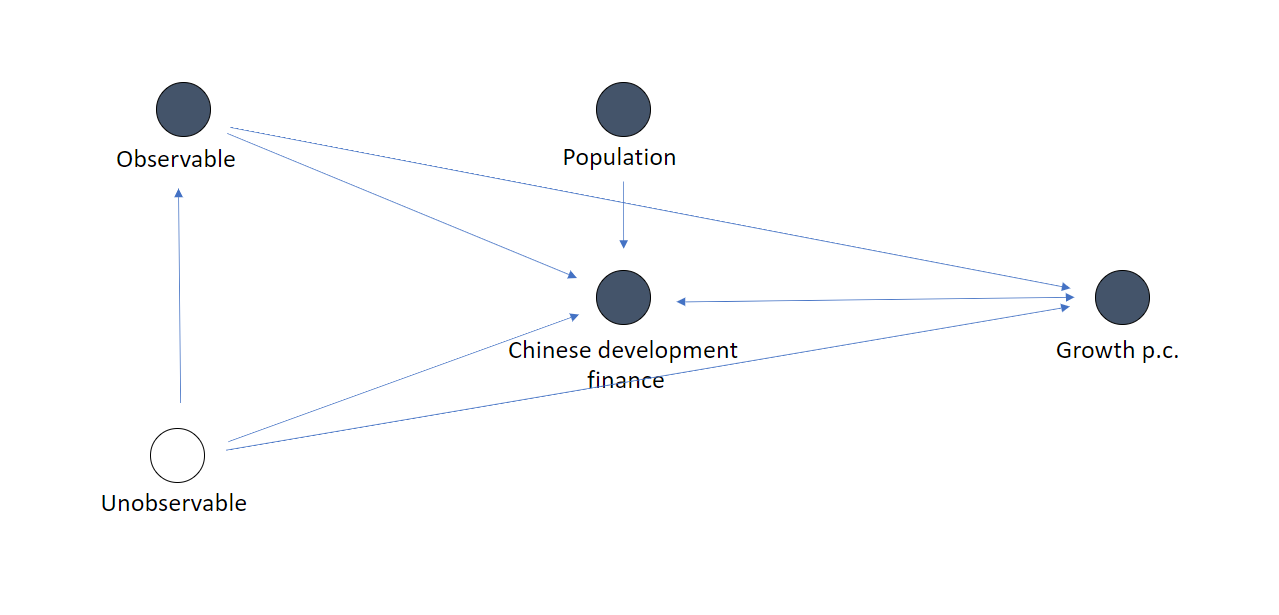

In addition to these observable variables, there are a number of unobservable variables that influence not only Chinese development aid, but also the outcome. Thus,  several backdoor paths must be closed in order to isolate the causal effect of Chinese development aid on growth p.c. It is important to note that the setup differs from most previous studies in which the researchers employed Aid (Official Chinese finance) either in per capita terms or as a share of GDP. As a result, the effect of population and population growth is the same as the effect of GDP and GDP growth. In this case, the authors choose to use either the project count or the logged financial value as the variable for development aid while explicitly controlling for population size.



As pointed out by the authors, the development finance is likely to be endogeneous to the dependent variable, here growth p.c.. A potential source of its endogeneity is reverse causation: Not only does Chinese financial development have the potential to drive growth, but the growth of a recipient country may influence Beijing's decision to deploy development finance. The Chinese development finance and the real GDP per capita growth may correlate positively as the Chinese government prefers to concentrate its development finance towards countries with high growth. However, a negative correlation is also possible due to the Chinese government's stated goal to deploy aid to as many people in need as possible. Looking on this setup so far, it appears rather lean compared to the rich dataset. It is therefore possible that the errorterm correlates with the dependent variable, so we have the risk of omitted-variable bias.



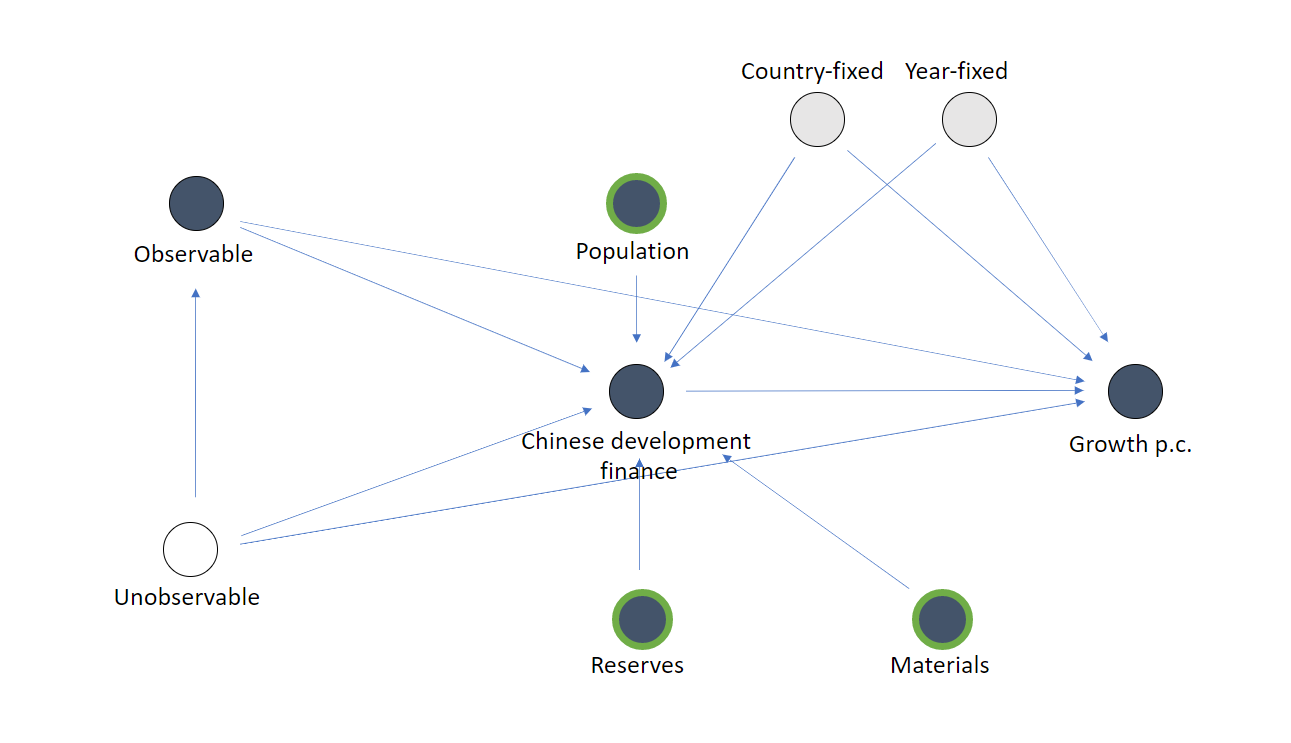

To address these problems, the authors employ an instrumental variables strategy which is based on the insights that we already gained during the analysis of the reasons for the allocation of Chinese development finance: 



As can be seen in the second graph, the endogeneity is addressed by using two instruments:

* Chinese production materials (steel, aluminum,...) which varies over time, interacted with the probability of receiving Chinese development aid (varying across recipient countries, time constant)


* China´s net foreign exchange reserves, varying over time, again interacted with the probability of receiving development aid which is again constant over time.

Adding these instruments is still not sufficient to isolate the causal effect of Chinese development aid on the Growth per capita. In the second causal graph, the instruments are suspected to violate the exclusion restriction since the probability of receiving Chinese development finance may be directly linked to the growth in the recipient country. As stated before, the growth of a country in p.c. terms may influence the behavior of the Chinese government, both positively and negatively and thus affects the probability that a country receives aid. To account for this, we need to control for individual effects of the observed countries and years through country-fixed and year-fixed effects to account for the individual and time varying part of the two instruments. This allows us to control for everything that is fixed for a specific country or year, whether or not it is measured. Since only one variable for the population size is included out of all commonly used control variables in the most previous ais literature, the efficiency of the estimator is reduced but there is also no introduction of a bias to the estimates due to the probable endogeneity of the classical control variables. 

# 5. Empirical Strategy <a name="section5"></a>

The aim is to analyze the causal effect of the Chinese development finance on growth as identified above. The authors set up the following regression for all recipient countries that are not listed as high-income countries by the worldbank given the year $t$:


\begin{equation}
Growth_{i,t} = \beta_{1}OF_{CHN,i,t-2} + \beta_{2}pop_{i,t-1} + \beta_{3}\eta_{i} + \beta_{4}\mu_{t} + \epsilon_{i,t'} 
\end{equation}

* $Growth_{i,t}$ as recipients country $i$´s real GDP per capita growth in $t$,
* $OF_{CHN,i,t-2}$ as measure of Chinese development finance two years before (either as the number of projects or their logged financial value),
* $pop_{i,t-1}$ indicates recipients $i$ logged population size in $t_{-1}$,
* $\eta_{i}$ represents country-fixed effects,
* $\mu_{t}$ the time fixed effects and
* $\epsilon_{i,t'}$ the error term.

As discussed for the identification, the development finance $OF_{CHN,i,t-2}$ is likely to be endogenous to the dependent variable $Growth_{i,t}$.

## 5.1 IV Strategy <a name="section5.1"></a>

This described endogeneity is addressed by designing an instrumental variables regression using the following first-stage regression:

\begin{equation}
OF_{CHN,i,t-2} = \gamma_{1}Material_{t-3} * p_{CHN,i} + \gamma_{2}Reserves_{t-3} * p_{CHN,i} + \gamma_{3}pop_{i,t-1} + \gamma_{4}\eta_{i} + \gamma_{5}\mu_{t} + \mu_{i,t-2} 
\end{equation}

The instruments are:

* $Material_{t-3}$ the lagged, detrended and logged Chinese production materials varying in $t$,


* $Reserves_{t-3}$, the lagged and detrended change in China´s ne foreign exchange reserves,

both interacted with:
* $p_{CHN,i}$ the probability of country $i$ receiving Chinese development finance, as share of years in the 2000-2014 period that country $i$ has received Chinese development finance.

The two interacted variables are expected to have positive coefficients. It indicates that countries which frequently receive financial development from China are expected to benefit disproportionally from increasing overproduction of materials and foreign reserves. As discussed above, to address the possible violation of the exclusion restriction, we are controlling for  
country- and year-fixed effects, $\eta_{i}$ and $\mu_{t}$ respectively, to control for the country- and time specific effects of $p_{CHN,i}$ as well as for the levels of Materials and Reserves. Given that the setup takes into account the effects of the probability of receiving Chinese development, its interaction with an exogeneous variable results in an exogenous instrument (under assumption of parallel trends as discussed in the following).

Since we measure the differential effects that $Material_{t-3}$ and $Reserves_{t-3}$ have on the amount of Chinese development finance $OF_{CHN,i,t-2}$ for countries with a high compared to a low probability of receiving these projects, we use the intuition of a **difference-in-difference (DiD)** setting:

Although the probability of receiving projects differs among the recipient countries and while controlling for country- and year-fixed effects, we assume that the real GDP per capita growth, $Growth_{i,t}$, of all countries grouped by different $p_{CHN,i}$ is not affected differently by changes in the availability of $Material_{t-3}$ and $Reserves_{t-3}$, but only affected via $OF_{CHN,i,t-2}$. Therefore, $Material_{t-3}$ and $Reserves_{t-3}$ are assumed to be exogenous to official financing since they both cannot be correlated with the errorprocess and we end up with an exogenous treatment $OF_{CHN,i,t-2}$ for our regression. This setting allows to account for the unobserved variables, here the country- and year-specific effects.

## 5.2 Model Specifications <a name="section5.2"></a>

As already stated, the authors' setup deviates from existing literature and research in a number of ways. The authors choose the number of projects or their financial value as a measure for the amount of aid rather than aid p.c. or aid as a share of GDP as previous studies did. Besides that, and the rather parsimonious main regression model, the authors' setup deviates in more ways from extant literature on aid and growth: 

* First of all, the dataset distinguishes between OOF and ODA projects in contrast to existing literature. This presents the opportunity to explain different impacts of development aid depending on the project type. To account for this, the treatment definition varies such that we can separately investigate the growth effects of more concessional finance (ODA) and less concessional (or market-based) forms of official financing (OOF) from China.  

* Secondly, since the dataset was collected using the TUFF methodology, the researchers rely on project commitments rather than disbursements. For this purpose, the lagged nature of the Chinese development finance is introduced. The 2-year lag is based on a subsample of 300 projects that contain information on the actual start and ending points and is consistent with conventional wisdom. Note that since only 300 projects are selected into this subsample, the subsample itself may suffer from selection bias, so there will be results presented using various lag structures. 

* Thirdly, since the dataset is restricted to the 2000-2014 period, the analysis is performed using annual data rather than averaged data. This is important regarding the interpretation of the results, which therefore primarily tests whether Chinese development finance has an effect on growth p.c. in the short run. 



Let's look at the key assumption of DiD (parallel trends), which states that average outcomes of the groups in the absence of treatment would follow parallel paths over time. In the theoretical setting of the authors, they assume this assumption to be satisfied since the growth of countries with different probabilities of receiving projects is not affected differently by changes in $Material_{t-3}$ and $Reserves_{t-3}$ (as stated before).  


## 5.3 Checking Parallel Trends Assumption <a name="section5.3"></a>



In the following we use another dataset provided by the authors. This dataset contains more information than the previous used ones and reports data for a longer time horizon. This is required to transform the data since the replication relies on lagged variables. The data is modified as follows: 

* Because the authors use lagged variables in the stated setup, we must determine whether we have long enough periods of observations for each receiving country, rather than just a few years, to be able to lag them. Another problem arises since the observed years are not necessarily continuously reported. I account for this problem by adding rows containing np.nan for all countries that miss some years of observation in the first step.  


* New lagged variables are created afterwards as described in the paper and some variables are renamed. Due to the added extra rows, I am able to lag all variables accordingly.


* Finally, I clean the data and apply the final to only include the observations from 2002-2016 for growth p.c. and 2000-2014 for the Chinese development finance (two years lagged). 


After modifying, we end up with a dataset containing the same countries that the authors listed in their Appendix C.

In [23]:
effectiveness_data = get_effectiveness_data(multiindex = False)
len(effectiveness_data.code.unique())

150

In [24]:
results_df = get_parallel_trends_df(effectiveness_data)

For a violation of the exogeneity of our interacted instrument, the changes in the logged input materials or foreign reserves have to affect recipient-country growth differentially in countries with a high compared to a low probability of receiving Chinese projects for reasons unrelated to China’s official financing. The next plot rebuilds Figure II of the paper. 

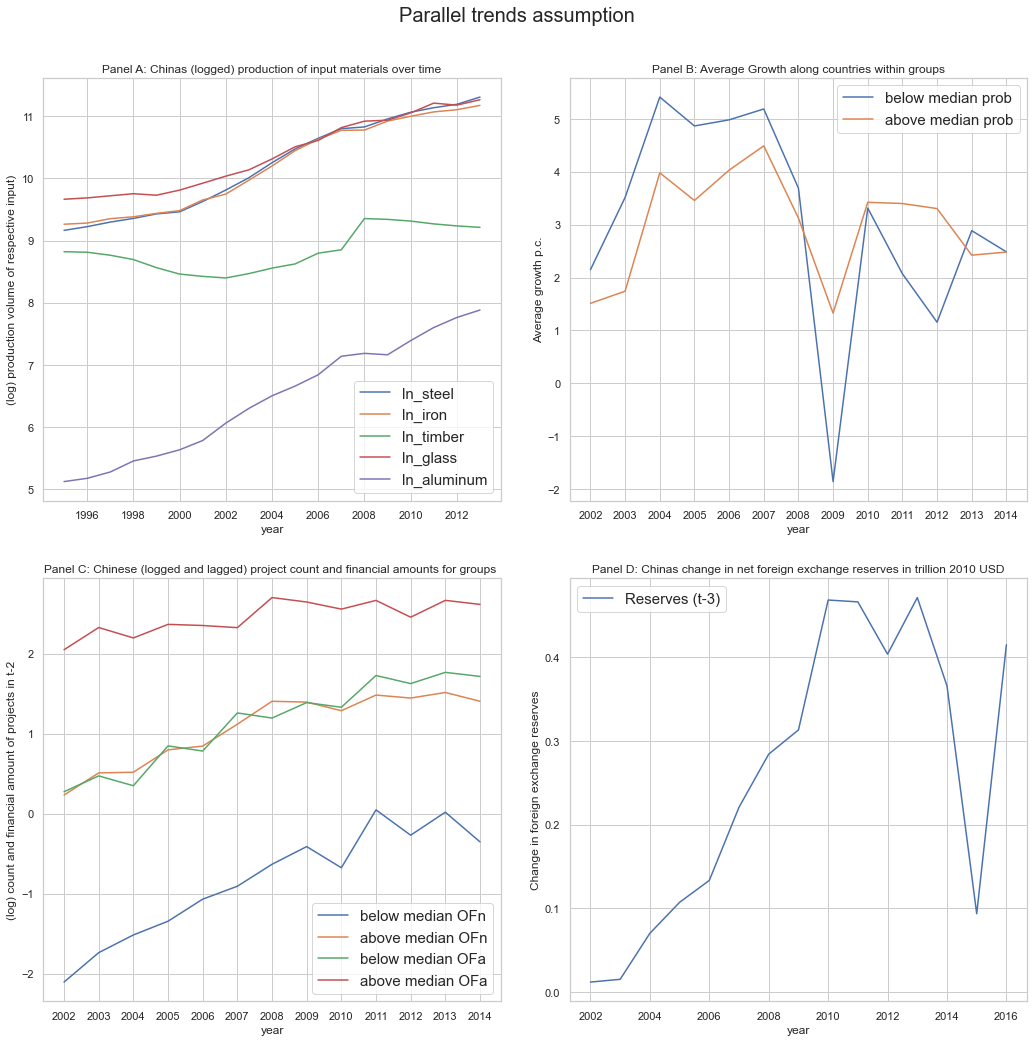

In [25]:
plot_parallel_trends(results_df, effectiveness_data)

Panel A shows the logged Chinese production of aluminum (in 10,000 tons), cement (in 10,000 tons), glass (in 10,000 weight cases), iron (in 10,000 tons), steel (in 10,000 tons), and timber (in 10,000 cubic meters) over time. 
Panel B and C illustrate the group-specific trends in the per capita growth of GDP (Panel B) as well as the number of projects and their financial value (Panel C) for two groups. OFn indicates Chinese development finance in terms of project counts whereas OFa stands for the financial amount a country receives, both logged here. The groups are defined by having an above the median probability to receive a project and a probability that lies below the median. Panel D is showing Chinas change in net foreign exchange reserves in trillion constant 2010 USD.

Looking at this panels, the probability specific trends for receiving a Chinese development project as well as the lagged and logged financial value of the projects (Panel C) seem all mostly parallel across the countries grouped by having a above median probability of receiving aid compared to a below median probability of receiving aid. This can also be said about the trend in the growth p.c of the recipient countries, which is also mostly parallel across the groups. 

The figure illustrates also that the Chinese input production (Panel A) as well as the more pronounced changes in the Chinese foreign reserves (Panel D) do not seem to have a different impact on countries with a high compared to a low probability of receiving projects. Therefore, the results give no reasons to assume that the parallel trend assumption is violated.


# 6. Does Chinese Development Finance Promote Growth? <a name="section6"></a>

## 6.1 Main Results <a name="section6.1"></a>

--- 

<span style="color:blue">**NOTE**:</span> Please note that the authors used a STATA function which enabled them to do the 2SLS with fixed effects in one step. I could not find a function in Python doing the same, so I used PanelOLS and preformed the first- and second stage regression separately. **Therefore, the computed standard errors of the second stage models are invalid in the whole section 6,** since they do not adjust for using predictions from the first-stage regression 

as regressors in the second-stage regression.  

  

Nevertheless, I will include these standard errors, since they are close to the reported ones in the paper. **If my invalid reported standard errors cause an interpretation that is not in line with the reported results of Dreher et al. (2021), I will indicate and discuss this.** 

  

--- 

This time we get the data using the function and setting multiindex equal to True. This gives us the same dataset as before but with an multiindex such that we can apply linearmodels PanelOLS.

The following regression tables will present the main results of the effect of Chinese development finance on growth for the 2002-2016 period. First, we will look at the results when we take $OF_{CHN,i,t-2}$ as the sum of all projects (without distinguishing between project types) and $OF_{CHN,i,t-2}$ as the (log) financial amount of all projects.

The first three columns show the result when we take the sum of all projects (without distinguishing between project types) as  $OF_{CHN,i,t-2}$. The first column shows the results using OLS, the second the first stage regression and the third the second stage regression.

##### Replication of Table 3:
##### All Projects

In [26]:
effectiveness_data = get_effectiveness_data(multiindex = True)

In [27]:
OFn_OFa_all_Table2(effectiveness_data, table = True)

                                                   Model Comparison                                                   
                                 OLS OFn_all    FS OFn_all    SS OFn_all    OLS OFa_all       FS OFa_all    SS OFa_all
----------------------------------------------------------------------------------------------------------------------
Dep. Variable                      growth_pc     l2OFn_all     growth_pc      growth_pc     l2OFa_all_ln     growth_pc
Estimator                           PanelOLS      PanelOLS      PanelOLS       PanelOLS         PanelOLS      PanelOLS
No. Observations                        2061          2061          2061           2061             2061          2061
Cov. Est.                         Unadjusted     Clustered     Clustered     Unadjusted        Clustered     Clustered
R-squared                             0.0104        0.0459        0.0128         0.0054           0.0060        0.0121
R-Squared (Within)                   -0.0272    

##### OOFV Projects

In [28]:
OFn_OFa_oofv_Table2(effectiveness_data, table = True)

                                                     Model Comparison                                                    
                                 OLS OFn_oofv    FS OFn_oofv   SS OFn_oofv   OLS OFa_oofv       FS OFa_oofv   SS OFa_oofv
-------------------------------------------------------------------------------------------------------------------------
Dep. Variable                       growth_pc     l2OFn_oofv     growth_pc      growth_pc     l2OFa_oofv_ln     growth_pc
Estimator                            PanelOLS       PanelOLS      PanelOLS       PanelOLS          PanelOLS      PanelOLS
No. Observations                         2061           2061          2061           2061              2061          2061
Cov. Est.                          Unadjusted      Clustered     Clustered     Unadjusted         Clustered     Clustered
R-squared                              0.0080         0.0356        0.0066         0.0065            0.0444        0.0068
R-Squared (Within)      

##### ODA Projects

In [29]:
OFn_OFa_oda_Table2(effectiveness_data, table = True)

                                                   Model Comparison                                                   
                                 OLS OFn_oda    FS OFn_oda    SS OFn_oda    OLS OFa_oda       FS OFa_oda    SS OFa_oda
----------------------------------------------------------------------------------------------------------------------
Dep. Variable                      growth_pc     l2OFn_oda     growth_pc      growth_pc     l2OFa_oda_ln     growth_pc
Estimator                           PanelOLS      PanelOLS      PanelOLS       PanelOLS         PanelOLS      PanelOLS
No. Observations                        2061          2061          2061           2061             2061          2061
Cov. Est.                         Unadjusted     Clustered     Clustered     Unadjusted        Clustered     Clustered
R-squared                             0.0087        0.0529        0.0154         0.0062           0.0074        0.0145
R-Squared (Within)                   -0.0260    

As shown in column one and for of each of the regression comparisons (simple PanelOLS model), the number of Chinese government financed development projects is positively correlated with the growth p.c in the recipient countries. The same holds true when we are looking at financial amounts rather than numbers, but the effect is statistically weaker as will be discussed in the following. 

## 6.2 Extension - Visual Representation of Results <a name="section6.2"></a>

In the following, the 90% confidence interval is routinely plotted and discussed.  

**Keep in mind that we want to detect an effect on growth for the two-year lagged measurement of Chinese Official Finance, so growth p.c. has to be interpreted as growth p.c. two years after commitment** 

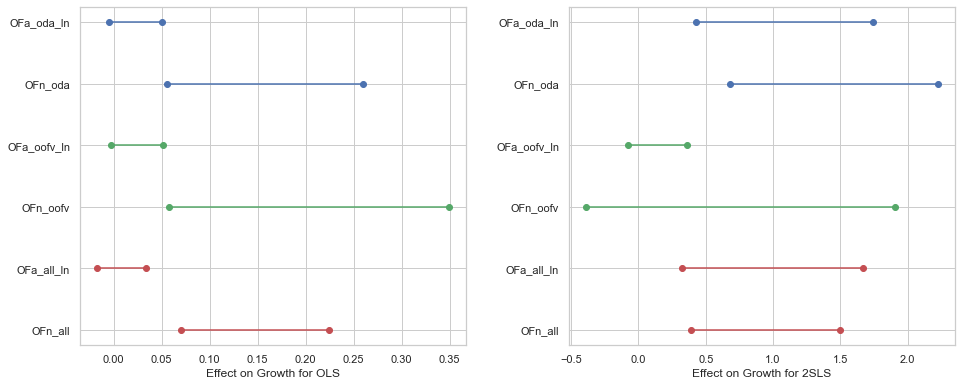

In [30]:
confidence_intervall_plot(effectiveness_data, 0.1, "standart")

### OLS

Using a 90% confidence interval, an additional Chinese development finance project (OFn_all) is associated with a growth p.c between 0.07 and 0.23 percentage points. The results are similar when we looking at only the OOF like and vague OOF-like projects (OFn_oofv) as well as the ODA-like defined projects (OFn_oda). 
What can be seen in the plot that depicts the CI´s is that an additional OOF-like or vague OOF-like project is associated with more growth than the stricter ODA-like projects. A doubling of the amount of Chinese OF (OFa_all_ln) to the average recipient country is only associated with a change in growth p.c. between -0.02 to 0.03 percentage points. The effect that the amount has on the growth p.c- remains little, but is again higher for the OOF- and vague OOF-like projects. 

### 2SLS

As described in Chapter 3.3, the OLS results in the first column of each regression table are likely to be biased by endogeneity. The second and fifth columns of each table represent the first stage regression results and the third and the sixth columns the second stage results.  

  

As expected, and stated in Chapter 3.3, the two instruments have positive coefficients in all but one first-stage regressions. This confirms the thesis that increases in the supply of production inputs and reserves have a disproportionally positive effect on projects for countries that receive Chinese support on a more regular basis.  

  

As can be seen in the third and sixth columns of the tables, an additional Chinese financed project increases economics growth. This holds true not only for the sum of all project types, but also if we look at ODA and OOFV- type projects. Moreover, the effect of Chinese official financing on growth p.c. is overall stronger than what OLS predicted in the biased endogenous setup. Looking at the confidence level plot and using the numbers obtained from the regressions, an additional Chinese project increases growth by 0.41 to 1.49 percentage points, compared to the 0.07 to 0.23 percentage point increase that is reported for OLS. Opposing to the results for OLS, OOF-like and vague OOF-like projects are not associated with more growth compared to the stricter ODA-like projects, as was the case for the OLS model. ODA-like projects on the other hand increase the growth p.c. in a range of 0.69 to 2.21 percentage points, which is a huge increase to the range calculated for OLS. 

  

When looking at financial amounts rather than project numbers (columns 4-6 of each table), the effects are persistent. The effect on growth that the Chinese development finance in financial terms has is again larger for the development aid in the strict sense, namely ODA-like projects. Chinese OOF and vague OOF-like projects show a point estimate of 0.76, but the plot and the regression itself imply a 90% confidence interval which is containing zero. But by looking at the plot we can clearly see a non-zero positive effect for OOFV-like projects on growth. 






## 6.3 Extension - Checking Instrument Validity <a name="section6.3"></a>

#### Instrument relevance 

Weak instruments provide only little insight into the variation of the endogenous variable. In our setting, although the instruments in all first- stage regressions are not individually significant at conventional levels, the rule of thumb for weak instruments indicates that our instruments are jointly significant (F- statistic > 10 while looking at the individual regression tables before columnbind them in nice tables for the output). This is also due to the obvious correlation between those instruments (years with high production result in high export surpluses). 

  

#### Overidentifying test 

If there is correlation between an instrument and the error term, IV regression is not consistent as pointed out before. Since I had to calculate the 2SLS estimates in two steps, I could not use the functions of linearmodels.iv.results. Unfortunately, I could not find another function to check for the exogeneity of the instruments. Therefore, I wrote my own function which tests for the overidentifying restriction. 

In [31]:
# calling the regression-outputs of interest
OLS1, FS1, SS1, OLS2, FS2, SS2 = OFn_OFa_all_Table2(effectiveness_data, table = 0)
OLS1_oofv, FS1_oofv, SS1_oofv, OLS2_oofv, FS2_oofv, SS2_oofv = OFn_OFa_oofv_Table2(effectiveness_data, table = 0)
OLS1_oda, FS1_oda, SS1_oda, OLS2_oda, FS2_oda, SS2_oda = OFn_OFa_oda_Table2(effectiveness_data, table = 0)

(0.5222, 0.0002)

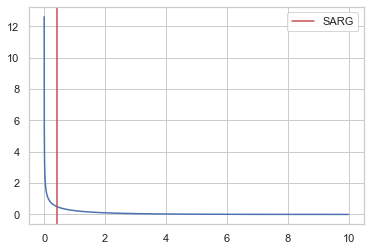

In [32]:
OveridentifyingTest_after_Sargan(FS1, SS1, effectiveness_data, True)

The first output value represents the p-value for the Chi-squared Sargan teststatistic and the second output value represents the $R^2$ for the regression of the residuals on all exogenous variables. If the instruments and the exogenous model variables are truly exogenous, they should not be correlated with the residuals and the regression of the residuals on the exogenous variables should yield a low $R^2$.

According to the results, the value for the Chi-squared distributed Sargan teststatistic (computed for the number of all projects (OFn_all)),

$SARG = n * R^2$,

lies well below all critical values. In addition, the reported $R^2$ is very low. Following this, we fail to reject the null hypothesis that we have exogenous instruments and proofed that our instruments are exogenous. 

When looking at the other results for the 2SLS models, we get similar results. If you want to try this, just enter different corresponding first- and second stage models into the OveridentifyingTest_after_Sargan function. The following table conducts the Overidentifying test for all models and does also include the $R^2$ values for the regression of the 2SLS residuals on the exogenouos variables (IV´s and other variables).

In [33]:
all_p_values(effectiveness_data)

,p_value,R_squared
OFn_all,0.5222,0.0002
OFa_all_ln,0.5508,0.0002
OFn_oofv,0.5692,0.0002
OFa_oofv_ln,0.9885,0.0
OFn_oda,0.172,0.0009
OFa_oda_ln,0.4342,0.0003


As can be seen by exploring the implemented function for the different models that are set up depending on the project type and by looking at the last output, the overidentifying restrictions test fails to reject that additional instruments are exogenous.

## 6.4 Timing of the Growth Effects <a name="section6.4"></a>

To investigate the timing of the effect of Chinese development finance on growth, a variant of the previous model setup is estimated, where the lag structure of aid changes. The lag structure of the instruments is changed in analogy, meaning that when we lag the Chinese development finance by four years (remember: two-year lag in baseline model), we change the lag structure of the instruments by five years. The baseline result is also included for convenience.

In [34]:
effectiveness_data_lagged = get_effectiveness_data_various_lags(True)

In [35]:
various_lags_2SLS = various_lags_2SLS_table(effectiveness_data_lagged)
various_lags_2SLS

,All projects,OOF projects,ODA projects,(log) All amounts,(log) OOF amounts,(log) ODA amounts,Observations
Chinese OF (t+1),-0.02,0.367,-0.158,0.122,0.099,-0.057,2102
SE (t+1),(0.296),(0.527),(0.382),(0.282),(0.09),(0.271),-
Chinese OF (t+0),0.418,0.461,0.681,0.473,0.118,0.449,2109
SE (t+0),(0.284),(0.551),(0.384),(0.285),(0.096),(0.285),-
Chinese OF (t-1),0.814,0.849,1.23,0.848,0.156,0.888,2087
SE (t-1),(0.293),(0.293),(0.293),(0.293),(0.293),(0.293),-
Chinese OF (t-2),0.948,0.761,1.45,0.995,0.142,1.086,2061
SE (t-2),(0.336),(0.698),(0.47),(0.408),(0.132),(0.401),-
Chinese OF (t-3),0.888,0.535,1.541,0.955,0.095,1.27,1916
SE (t-3),(0.382),(0.854),(0.517),(0.429),(0.149),(0.442),-


---
<span style="color:blue">**NOTE**:</span> Remember: Since I had to manually calculate the 2SLS estimator, the standard errors are invalid. Since they barely differ from the reported ones, they are still included. If I detect any deviation from the reported standard errors of the paper that affect the interpretation, I will indicate this.

---

Looking at column 1 of the table, the coefficients and the reported standard errors suggest that Chinese development projects increase the growth from one to three years after they were committed since the coefficients are positive and statistically significant at the five percent level. The strongest growth seems to occur for the two-year lagged Chinese development finance, which is the baseline model that was depicted in depth in the previous subsections. For the other lags, the coefficients are insignificant and turn even negative for the six-year lagged model. The first row shows a placebo test, that investigates the effect of future aid on growth. As the coefficient is insignificant, the model fails to predict growth on the basis of future development finance, which is expected. 

The subsequent columns, column 2-6, report the effect that Chinese development finance has for the different project types and for the financial amounts rather than the project count (4-6). As in the paper by Dreher et al. (2021), the last column shows the number of observations.   

This is inline with the results reported by Dreher et al. (2021), although our standard errors are invalid as pointed out above. 

---
<span style="color:blue">**NOTE**:</span> I reported somewhat different values than Dreher et al. (2021) as well as the number of observations that I used sometimes differ slightly. I tried different ways of preparing the data, but could not replicate the same results. But nevertheless, **the interpretation of my results is inline with the results reported by Dreher et al. (2021).**

---

## 6.5 How does Chinese Development Finance cause Growth? <a name="section6.5"></a>

We have concluded that Chinese development finance seems to promote growth in the recipient countries. Dreher et al. (2021) seek to understand how exactly Chinese development finance is affecting growth by investigating how Chinese finance affects the specific components of GDP. All different components are thereby measured in differences of logged constant values.  

---
<span style="color:blue">**NOTE**:</span> Remember: Since I had to manually calculate the 2SLS estimator, the standard errors are invalid. If I detect any deviation from the reported standard errors of the paper that affect the interpretation, I will indicate this.

---

Replicating this table, I encountered some problems. I had to adapt my data preparation process (get_effectiveness_data2), which lead to more desirable results as they are more in line with the results by Dreher et al. (2021). Although I managed to nearly use the same number of observations and countries for the replication of each panel, my results differ from the results reported by Dreher et al. (2021). I suspect that this is because although the number of observations and countries is almost identical, the individual countries and also observations that I use might differ from those of the authors. Another possible explanation is that the authors dealt differently with the problem of missing or not contiguous observations:  
Since I calculated the differences of logged values, it often occurred that I had an observation for a specific year, but not for the year afterwards or before. So, I could not calculate the difference of the specific component of GDP for these years since I did not try to replace such missing values. I believe that there are better ways of dealing with such missing value issues than the way I dealt with them, especially if we have for example almost all observations for a certain period of time and a specific country in which only one observation is missing. In this case I would suggest that replacing this missing value with an average would increase the precision of my results and lower the standarderror.  


The results are depicted in the following nine panels, where each panel represents a specific component of GDP. As the authors point out, this decomposition creates a basis for expectations about future effects of deployed Chinese development finance: If the development finance committed to a project is entirely consumed, there will be no subsequent growth effects caused by this project. However, if the development finance has strong effects on investments this might promote future growth. 

In [36]:
effectiveness_data2 = get_effectiveness_data2(True)

In [37]:
replicate_table5(effectiveness_data2, 0.1)

Confidence Intervall reported for alpha: 0.1


,All projects (OFn(t-2)),OOFV projects (OFn(t-2)),ODA projects (OFn(t-2)),number Obs.,countries
Panel A: Gross Fixed Capital Formation,0.027,-0.015,0.044,1481,114
SE,(0.012),(0.026),(0.015),,
p-value,0.024,0.567,0.004,,
CI,"(0.0073, 0.0467)","(-0.0584, 0.0282)","(0.0186, 0.0688)",,
,,,,,
Panel B: Gross Fixed Privat Formation,0.1,0.173,0.14,1216,102
SE,(0.281),(0.417),(0.277),,
p-value,0.281,0.417,0.277,,
CI,"(-0.0526, 0.2524)","(-0.178, 0.5243)","(-0.0717, 0.3509)",,
,,,,,


The reported results in the table are mostly insignificant at common significance levels. Despite this insignificance of most of the coefficients, there are some important insights.

Turning to the gross fixed capital formation (also called investment), the results indicate that an additional Chinese project leads to an increase in gross fixed capital formation of 2.7 (90% CI: 0.73 - 4.7) percent. Dreher et al. (2021) report similar results with a coefficient of 2.4 and a 90% CI of 0.6 - 4.2. Looking at the results when considering ODA-like projects, the results are stronger with regard to both the magnitude and significancy, indicating that Chinese ODA-like development finance increases gross fixed capital formation more than all projects. From this we can follow, that the stricter ODA-like projects increase gross fixed capital formation in the recipient countries the most compared to the less concessional OOFV-like projects. Following this interpretation, investment seems to be the component of GDP that is the most affected by Chinese development finance. The effect of Chinese development finance on consumption is weaker, both in magnitude and significance. At the 5 and 10 percent significance level, the coefficients show no significance and an interpretation is therefore not feasible at these levels.  

Since I obtained many insignificant coefficients, the data at hand is not sufficient to make a feasible conclusion concerning the effect of variables other than gross fixed capital formation. Some possible reasons for this in my opinion are: First, it could just be that there is no significant effect of Chinese development on these components of GDP. Second, the variance of the data could be too large as a consequence of the unique way the dataset was constructed. Third, the sample size could not be sufficient to obtain statistically significant coefficients because the "signal-to-noise ratio" is too high. 
  
The authors conclude on this matter that the short-run effects on growth are explained the best via increases in investment and consumption, but also acknowledge that they lack the data to test whether this results in longer-run effects on the growth p.c of the recipient countries. 

## 6.6 Robustness Checks <a name="section6.6"></a>

To check the robustness of the results, the authors explore various different specifications of the model. In the following, we explore specifications that control for annual amounts of Chinese outward FDI and the Chinese exports to the recipient country. 
The following tables will therefore check the robustness when we include the mentioned additional control variables. 
This specifications account for the potential confounding when physical-input-based movements in Chinese FDI and exports account for differential growth effects in countries that regularly receive Chinese development finance compared to irregular recipients, rather than development finance. 

  
For readers clarity and comprehensibility, I depicted the results again by plotting the corresponding confidence intervals as an **extension**. The tables and the plotted confidence intervals are confirming the previous results for both of the proposed specifications. The effect of Chinese official finance seems even stronger than before. 


##### Specification controlling for Chinese exports

In [38]:
OFn_OFa_all_Table2_robustness(effectiveness_data, True, ["l2Exports_ln"])

                                              Model Comparison                                             
                           SS OFn_all   SS OFn_oofv    SS OFn_oda    SS OFa_all   SS OFa_oofv    SS OFa_oda
-----------------------------------------------------------------------------------------------------------
Dep. Variable               growth_pc     growth_pc     growth_pc     growth_pc     growth_pc     growth_pc
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 1530          1530          1530          1530          1530          1530
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0207        0.0158        0.0222        0.0216        0.0159        0.0220
R-Squared (Within)            -0.1112       -0.0748       -0.0811       -0.0985       -0.0672       -0.0709
R-Squared (Between)         

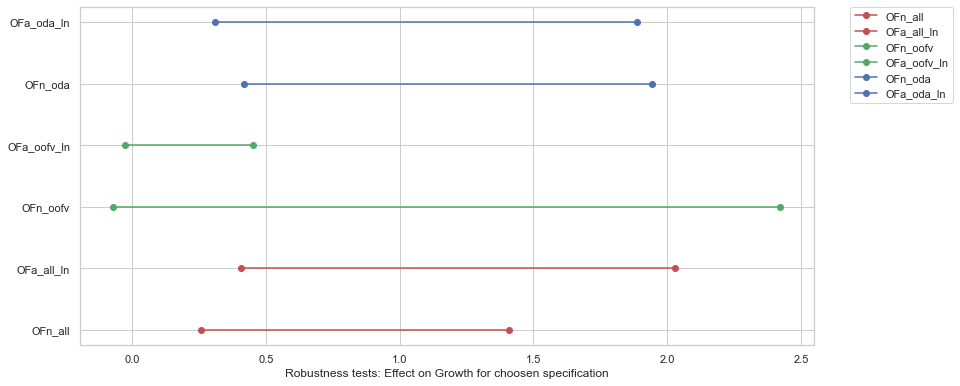

In [39]:
confidence_intervall_plot(effectiveness_data, 0.1, "l2Exports_ln")

##### Specification controlling for Chinese FDI

In [40]:
OFn_OFa_all_Table2_robustness(effectiveness_data, True, ["l2FDI_China_ln"]) #"l2Exports_ln"

                                              Model Comparison                                             
                           SS OFn_all   SS OFn_oofv    SS OFn_oda    SS OFa_all   SS OFa_oofv    SS OFa_oda
-----------------------------------------------------------------------------------------------------------
Dep. Variable               growth_pc     growth_pc     growth_pc     growth_pc     growth_pc     growth_pc
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                  932           932           932           932           932           932
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0272        0.0114        0.0298        0.0102        0.0103        0.0278
R-Squared (Within)            -0.2850       -0.0999       -0.1741       -0.0730       -0.0859       -0.1652
R-Squared (Between)         

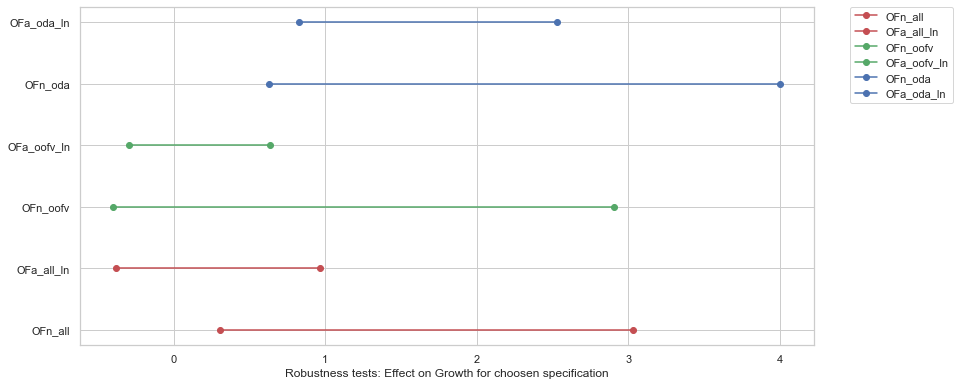

In [41]:
confidence_intervall_plot(effectiveness_data, 0.1, "l2FDI_China_ln")

# 7. Conclusion <a name="section7"></a>

Dreher et al. (2021) offer very detailed, comprehensive and robust insights on the allocation and effects of Chinese development finance and contribute towards closing this particular gap in the aid literature. The results that I replicated in this notebook as well as my own additional extensions support the findings of the authors for both the allocation of Chinese development finance and its effect on growth:  

  
Regarding the allocation of Chinese development finance, China seems to reward countries for their allegiance and mostly uses OOF-like finance, which has mostly a non-development purpose like export promotions. Therefore, China uses the development finance to a large extent for helping itself. The results for the effect of this finance on growth show that Chinese development finance boosts economic growth in the recipient countries in the short run but the data lacks to measure the long run effects. The results are persistent when looking at the number of projects that a country receives as well at the financial amounts across all project types, but the results are indicating that the growth effect is the highest for ODA-like projects that are consistent with the ODA criteria established by the OECD-DAC. 

  
The 2SLS results (Section 6) that I replicate differ with respect to the standard error, but this is due to the fact that I used Python instead of STATA and was not able to find a function for Python that can handle 2SLS for panel data with fixed effects. But despite these difficulties, all my results for section 6 are at least similar and inline with the results of Dreher et al. (2021). In all other sections I was able to replicate the paper precisely. This was possible since the authors provided their STATA code and were transparent and comprehensive in their research. Apart from replicating the paper, I add extension which I marked accordingly: I examine the identification strategy and add both computational and graphical extensions. Since the paper at hand is very thorough and detailed in my opinion, the aim of these extensions mainly is to improve the readers comprehensibility, therefore I focus on adding graphical extensions to support the main findings and depicting the results graphically. 


# 8. References and Literature <a name="section8"></a>


* Borenstein et al. (2009): Introduction to Meta-Analysis. Michael Borenstein, John Wiley & Sons, 2009


* Dreher, Axel, Andreas Fuchs, Bradley Parks, Austin Strange, and Michael J. Tierney. 2021. "Aid, China, and Growth: Evidence from a New Global Development Finance Dataset." American Economic Journal: Economic Policy, 13 (2): 135-174.


* Labrecque, J., & Swanson, S. A. (2018). Understanding the Assumptions Underlying Instrumental Variable Analyses: a Brief Review of Falsification Strategies and Related Tools. Current epidemiology reports, 5(3), 214–220. https://doi.org/10.1007/s40471-018-0152-1


* publichealth.columbia.edu (2021): Difference-in-Difference Estimation, online source [https://www.publichealth.columbia.edu/research/population-health-methods/difference-difference-estimation], last access 04.07.2021


* Zhou et al. (2016). Difference-in-Differences Method in Comparative Effectiveness Research: Utility with Unbalanced Groups. Applied health economics and health policy, 14(4), 419–429. https://doi.org/10.1007/s40258-016-0249-y


* Strange et al. (2017): AidData's Tracking Underreported Financial Flows (TUFF) Methodology, Version 1.3. Williamsburg, VA: AidData at William & Mary.


